# cisTopic visualisation: enrichment of signatures in topics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from scipy.io import mmread
import math
import scipy
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
topic_number = 18

In [4]:
# 3 B cell states - Naive, US-mem and S-mem
celltype_number = 3

In [5]:
# table with normalised AUC values for each cell and each topic aka probabilities

cisTopic_signatures = pd.read_csv('./cisTopic_signatures_enrichment.csv',sep='\t')


In [6]:
cisTopic_signatures

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18
ATF2_GM12878,0.121780,1.712784,0.128833,-0.728190,-0.513904,-1.031092,0.432467,1.808051,1.214026,-1.793400,-0.272322,0.081704,0.205738,0.194848,-1.543607,-0.612217,0.981296,-0.386794
ATF7_GM12878,-0.057190,2.103259,-0.208383,-0.960686,-0.891456,-1.163930,0.804849,2.027176,0.904779,-0.865423,0.007191,0.201926,0.145173,-0.436835,-1.241359,-0.708422,0.793895,-0.454564
BATF_GM12878,1.197214,1.171148,-0.332211,-1.261018,-0.998672,-1.115005,1.404601,0.586020,0.564845,-1.123653,0.974113,1.535186,0.187036,-0.604759,-1.253067,-0.667084,0.415096,-0.679791
CTCF_Bcells,-1.017573,1.131770,0.444119,0.533505,0.590896,0.791377,-1.278813,1.167612,0.732978,-0.791514,-1.963503,-2.022710,0.379903,0.429761,-0.366572,0.430787,0.670278,0.137699
CTCF_GM12878,-1.165614,1.341781,0.237816,0.476589,0.402951,0.298741,-1.044034,1.582104,0.915124,-1.320538,-1.759763,-1.507733,0.524593,0.335433,-0.573618,0.289265,0.980153,-0.013250
E2F4_GM12878,-1.044067,1.843160,0.120949,-0.073570,0.107187,-0.165697,-0.844994,1.783507,1.130328,-0.915253,-1.456679,-1.439573,0.506873,0.280727,-0.833790,-0.042983,1.101401,-0.057527
EBF1_GM12878,0.071766,1.845477,-0.025813,-0.737078,-0.303397,-0.954532,0.648048,1.598945,1.036870,-1.801824,0.020828,0.355274,0.022640,-0.176053,-1.628186,-0.560489,1.144580,-0.557058
ETS1_GM12878,-1.143885,1.474295,0.261903,0.154243,0.186660,-0.180839,-0.615603,1.566971,1.241887,-1.391821,-1.602826,-1.302196,0.515388,0.465197,-0.892319,0.087653,1.221235,-0.045943
H3K27ac_GM12878,-0.692610,1.705121,0.112781,-0.203527,0.170891,-0.614013,-0.435319,1.645628,1.275641,-1.518995,-1.046340,-1.273707,0.667060,0.485625,-1.207448,0.006279,1.182044,-0.259111
IRF4_GM12878,0.082919,1.682042,0.194681,-0.487731,-0.312248,-0.807176,0.493730,1.571849,1.180982,-1.992816,-0.573016,-0.092075,0.447937,0.060005,-1.717061,-0.395613,1.103960,-0.440369


In [7]:
cisTopic_signatures.index = list(cisTopic_signatures.index)[:-4] + ['DMR_N_SM_hyper_diff','DMR_N_SM_hyper_equal','DMR_N_SM_hypo_diff','DMR_N_SM_hypo_equal']

In [8]:
cisTopic_signatures

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18
ATF2_GM12878,0.121780,1.712784,0.128833,-0.728190,-0.513904,-1.031092,0.432467,1.808051,1.214026,-1.793400,-0.272322,0.081704,0.205738,0.194848,-1.543607,-0.612217,0.981296,-0.386794
ATF7_GM12878,-0.057190,2.103259,-0.208383,-0.960686,-0.891456,-1.163930,0.804849,2.027176,0.904779,-0.865423,0.007191,0.201926,0.145173,-0.436835,-1.241359,-0.708422,0.793895,-0.454564
BATF_GM12878,1.197214,1.171148,-0.332211,-1.261018,-0.998672,-1.115005,1.404601,0.586020,0.564845,-1.123653,0.974113,1.535186,0.187036,-0.604759,-1.253067,-0.667084,0.415096,-0.679791
CTCF_Bcells,-1.017573,1.131770,0.444119,0.533505,0.590896,0.791377,-1.278813,1.167612,0.732978,-0.791514,-1.963503,-2.022710,0.379903,0.429761,-0.366572,0.430787,0.670278,0.137699
CTCF_GM12878,-1.165614,1.341781,0.237816,0.476589,0.402951,0.298741,-1.044034,1.582104,0.915124,-1.320538,-1.759763,-1.507733,0.524593,0.335433,-0.573618,0.289265,0.980153,-0.013250
E2F4_GM12878,-1.044067,1.843160,0.120949,-0.073570,0.107187,-0.165697,-0.844994,1.783507,1.130328,-0.915253,-1.456679,-1.439573,0.506873,0.280727,-0.833790,-0.042983,1.101401,-0.057527
EBF1_GM12878,0.071766,1.845477,-0.025813,-0.737078,-0.303397,-0.954532,0.648048,1.598945,1.036870,-1.801824,0.020828,0.355274,0.022640,-0.176053,-1.628186,-0.560489,1.144580,-0.557058
ETS1_GM12878,-1.143885,1.474295,0.261903,0.154243,0.186660,-0.180839,-0.615603,1.566971,1.241887,-1.391821,-1.602826,-1.302196,0.515388,0.465197,-0.892319,0.087653,1.221235,-0.045943
H3K27ac_GM12878,-0.692610,1.705121,0.112781,-0.203527,0.170891,-0.614013,-0.435319,1.645628,1.275641,-1.518995,-1.046340,-1.273707,0.667060,0.485625,-1.207448,0.006279,1.182044,-0.259111
IRF4_GM12878,0.082919,1.682042,0.194681,-0.487731,-0.312248,-0.807176,0.493730,1.571849,1.180982,-1.992816,-0.573016,-0.092075,0.447937,0.060005,-1.717061,-0.395613,1.103960,-0.440369


In [9]:
active_enh = ['Naive_active','GC_active','SM_active','Plasma_active']
poised_enh = ['Naive_poised','GC_poised','SM_poised','Plasma_poised']
primed_enh = ['Naive_primed','GC_primed','SM_primed','Plasma_primed']
all_3_marks_enh = ['Naive_all_3_marks','GC_all_3_marks','SM_all_3_marks','Plasma_all_3_marks']
TFs = ['ATF2_GM12878','ATF7_GM12878','BATF_GM12878','CTCF_Bcells','CTCF_GM12878','E2F4_GM12878','EBF1_GM12878',
      'ETS1_GM12878','H3K27ac_GM12878','IRF4_GM12878','NFATC1_GM12878','PAX5_GM12878','SP1_GM12878']
DMRs = ['DMR_N_SM_hyper_diff','DMR_N_SM_hyper_equal','DMR_N_SM_hypo_diff','DMR_N_SM_hypo_equal']

In [10]:
active_enh_df = cisTopic_signatures.loc[active_enh,:]
active_enh_list = [item for sublist in list(active_enh_df.values) for item in sublist]

poised_enh_df = cisTopic_signatures.loc[poised_enh,:]
poised_enh_list = [item for sublist in list(poised_enh_df.values) for item in sublist]

primed_enh_df = cisTopic_signatures.loc[primed_enh,:]
primed_enh_list = [item for sublist in list(primed_enh_df.values) for item in sublist]

all_3_marks_enh_df = cisTopic_signatures.loc[all_3_marks_enh,:]
all_3_marks_enh_list = [item for sublist in list(all_3_marks_enh_df.values) for item in sublist]

TFs_df = cisTopic_signatures.loc[TFs,:]
TFs_list = [item for sublist in list(TFs_df.values) for item in sublist]

DMRs_df = cisTopic_signatures.loc[DMRs,:]
DMRs_list = [item for sublist in list(DMRs_df.values) for item in sublist]

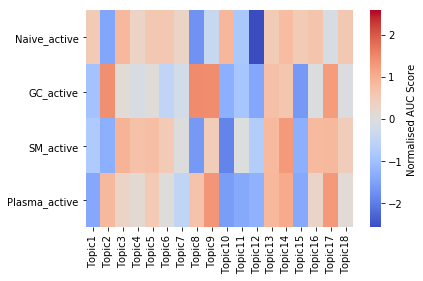

In [13]:
ax = sns.heatmap(active_enh_df, cmap='coolwarm', 
            vmin=-max(abs(max(active_enh_list)),abs(min(active_enh_list))), 
            vmax=max(abs(max(active_enh_list)),abs(min(active_enh_list))))
ax.collections[0].colorbar.set_label("Normalised AUC Score")
plt.savefig('./figures/cisTopic_active_enh_enrichment.pdf',bbox_inches='tight')

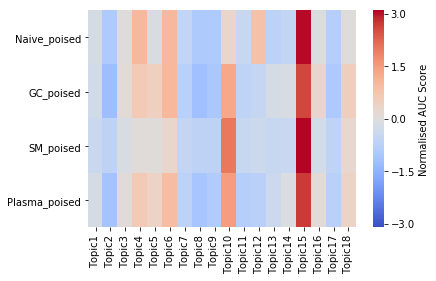

In [14]:
ax = sns.heatmap(poised_enh_df, cmap='coolwarm', 
            vmin=-max(abs(max(poised_enh_list)),abs(min(poised_enh_list))), 
            vmax=max(abs(max(poised_enh_list)),abs(min(poised_enh_list))))
ax.collections[0].colorbar.set_label("Normalised AUC Score")
plt.savefig('./figures/cisTopic_poised_enh_enrichment.pdf', bbox_inches='tight')

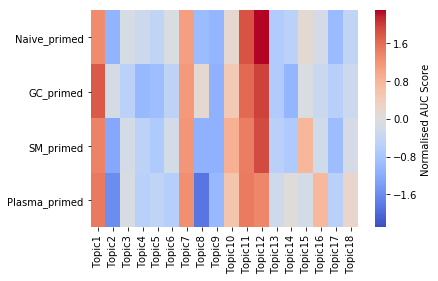

In [15]:
ax = sns.heatmap(primed_enh_df, cmap='coolwarm', 
            vmin=-max(abs(max(primed_enh_list)),abs(min(primed_enh_list))), 
            vmax=max(abs(max(primed_enh_list)),abs(min(primed_enh_list))))
ax.collections[0].colorbar.set_label("Normalised AUC Score")
plt.savefig('./figures/cisTopic_primed_enh_enrichment.pdf', bbox_inches='tight')

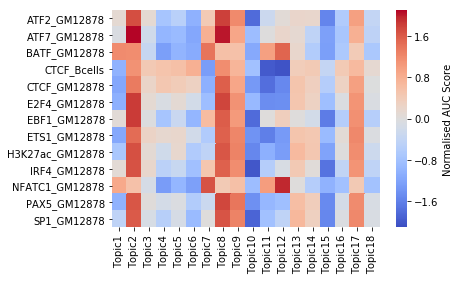

In [17]:
ax = sns.heatmap(TFs_df, cmap='coolwarm', 
            vmin=-max(abs(max(TFs_list)),abs(min(TFs_list))), 
            vmax=max(abs(max(TFs_list)),abs(min(TFs_list))))
ax.collections[0].colorbar.set_label("Normalised AUC Score")
plt.savefig('./figures/cisTopic_TF_enrichment.pdf', bbox_inches='tight')